In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data preprocessing

In [112]:
#load dataset into the pandas data frame
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
#print first 10 rows of dataset
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [113]:
#cheack the number of rows and columns of the dataset
df.shape

(374, 13)

this dataset contain 374 rows and 13 columns.

In [114]:
#print all column names
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [115]:
#print more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [116]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [117]:
#check number of null values in the each row
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

This dataset doesn't contain missing values.

In [118]:
#check the duplicate rows in the dataset
df.duplicated().sum()

0

This dataset doesn't contain duplciate values.

In [119]:
#drop Person ID column
df.drop(columns = 'Person ID', axis = 1, inplace = True)
df.shape

(374, 12)

Now it contain 3747 rows and 12 columns.

In [120]:
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data representation

Male      189
Female    185
Name: Gender, dtype: int64


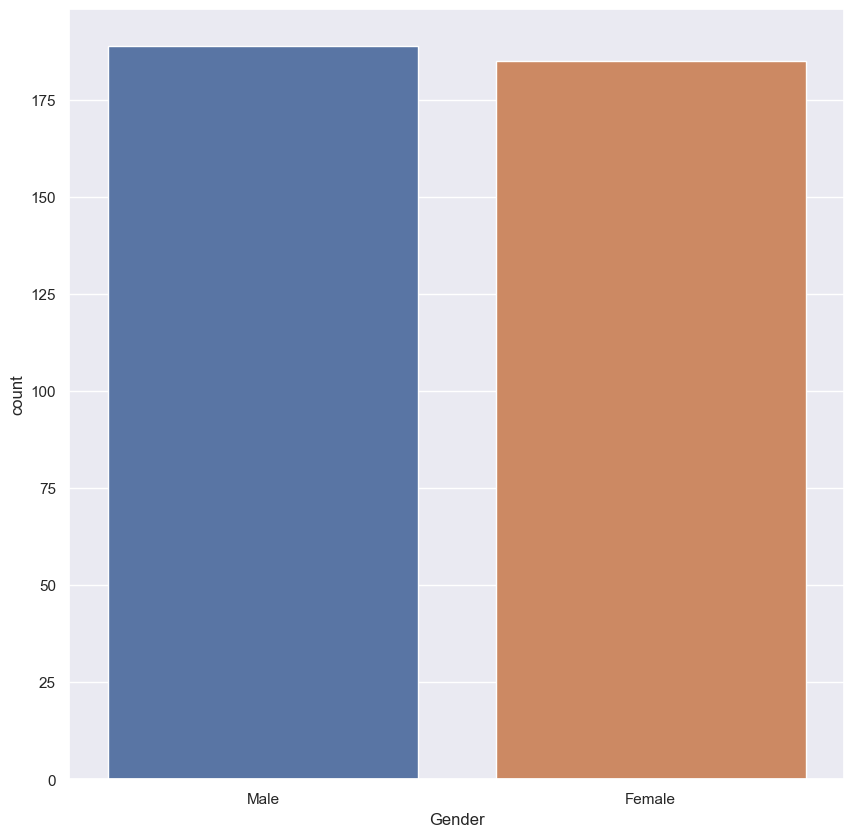

In [121]:
print(df['Gender'].value_counts())

sns.set()
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Gender', data = df)
plt.show()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64


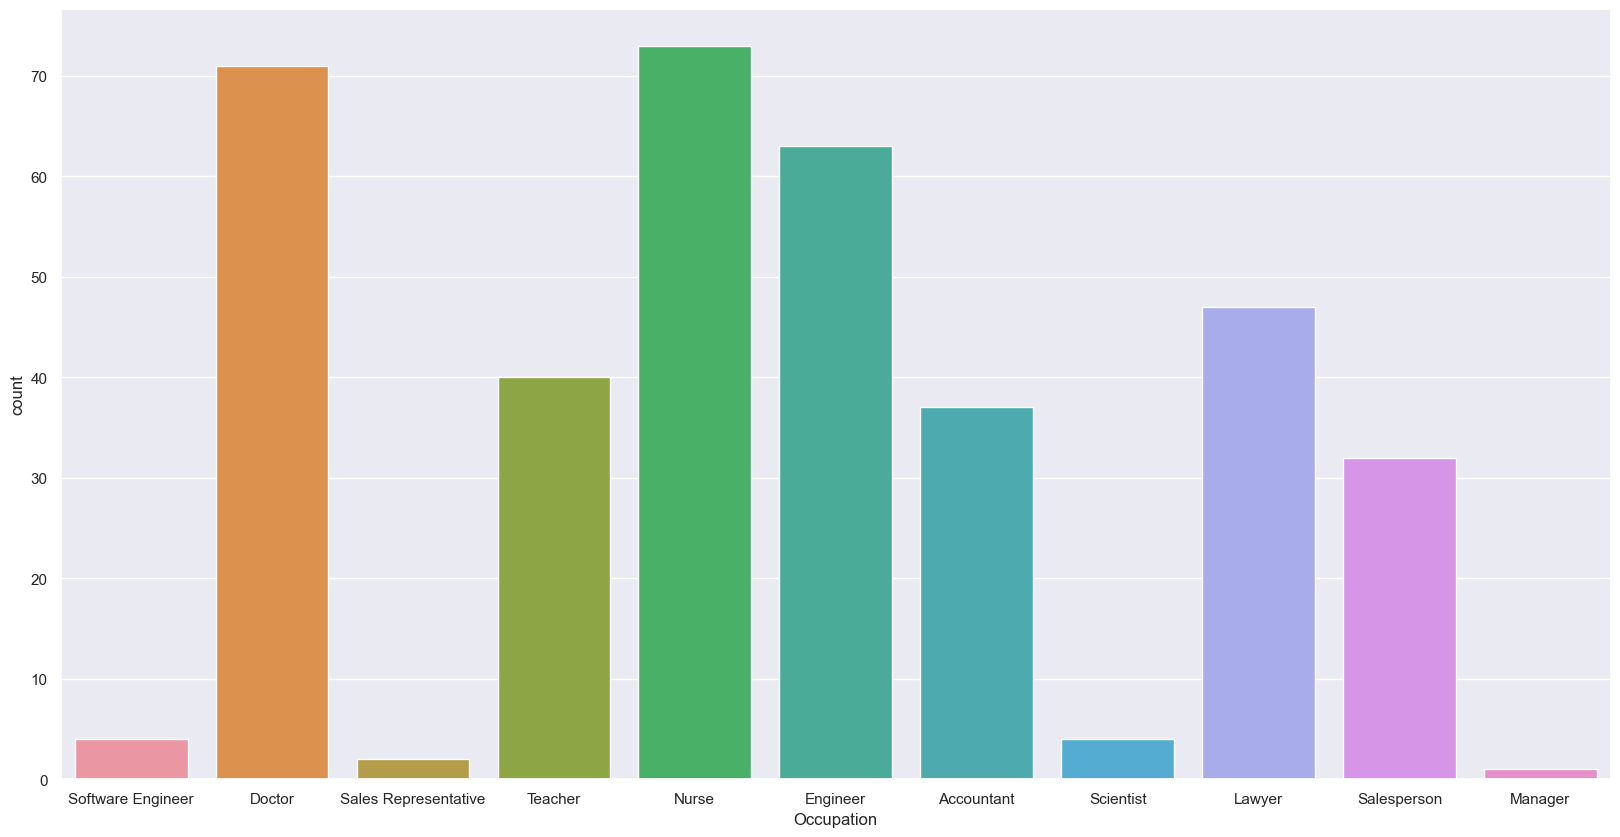

In [122]:
print(df['Occupation'].value_counts())

sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Occupation', data = df)
plt.show()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64


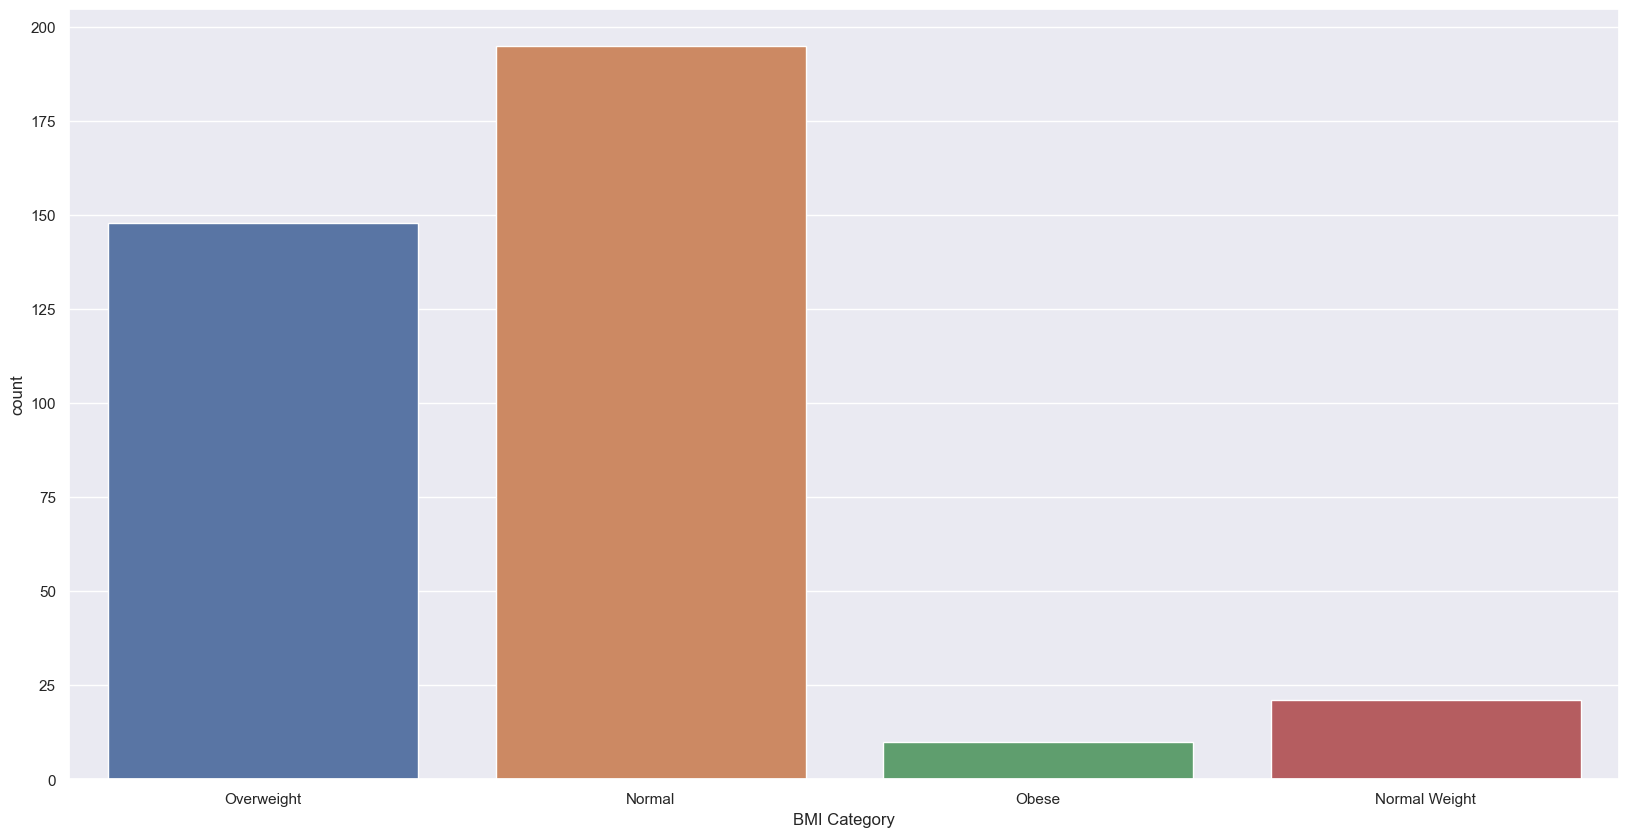

In [123]:
print(df['BMI Category'].value_counts())

sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'BMI Category', data = df)
plt.show()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64


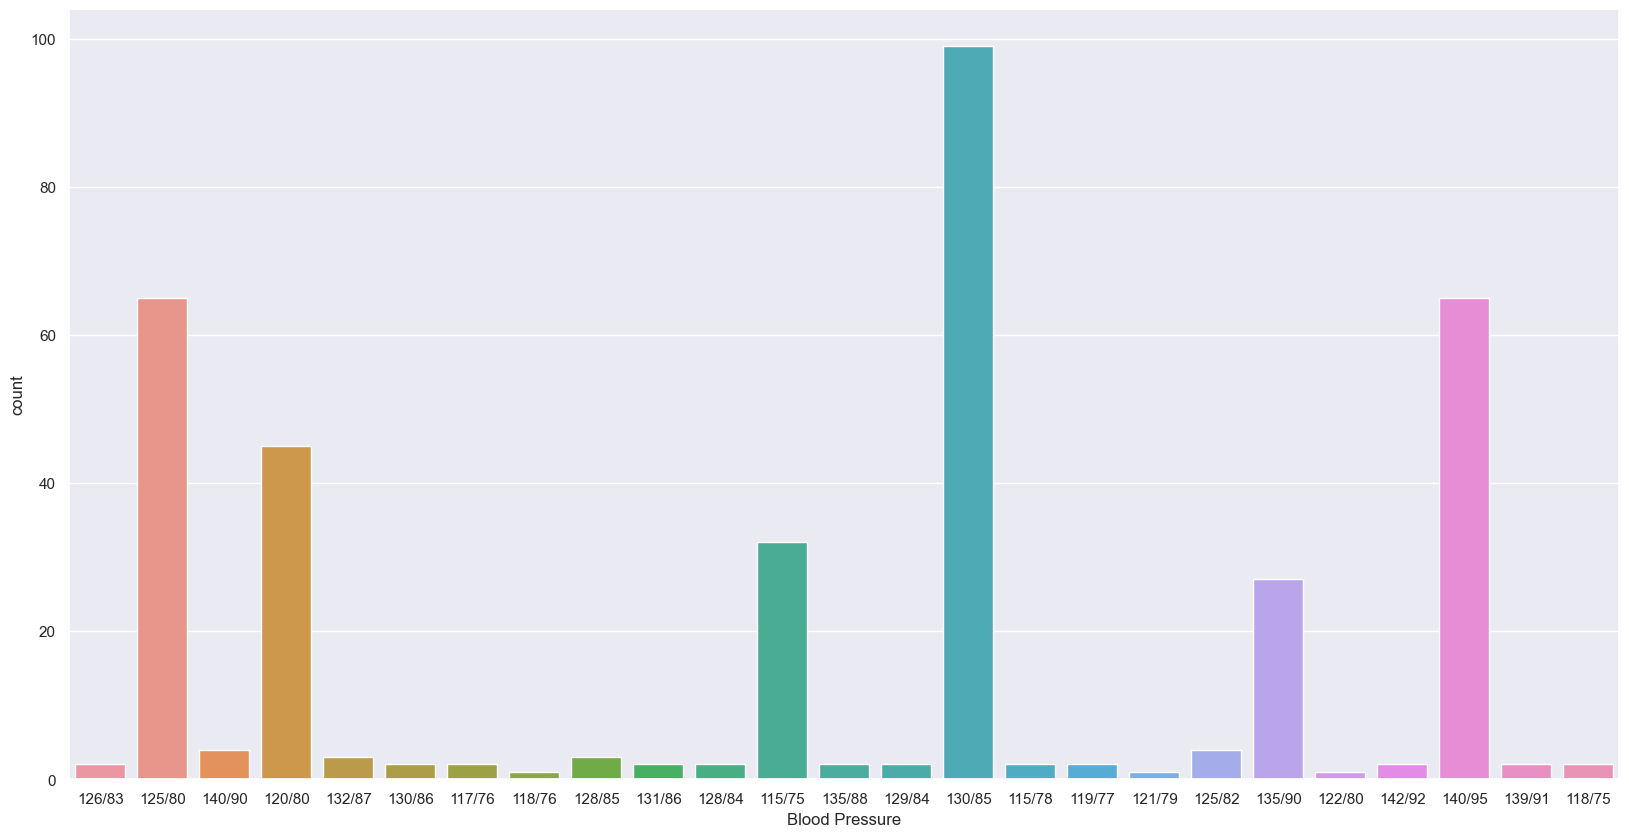

In [124]:
print(df['Blood Pressure'].value_counts())

sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Blood Pressure', data = df)
plt.show()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


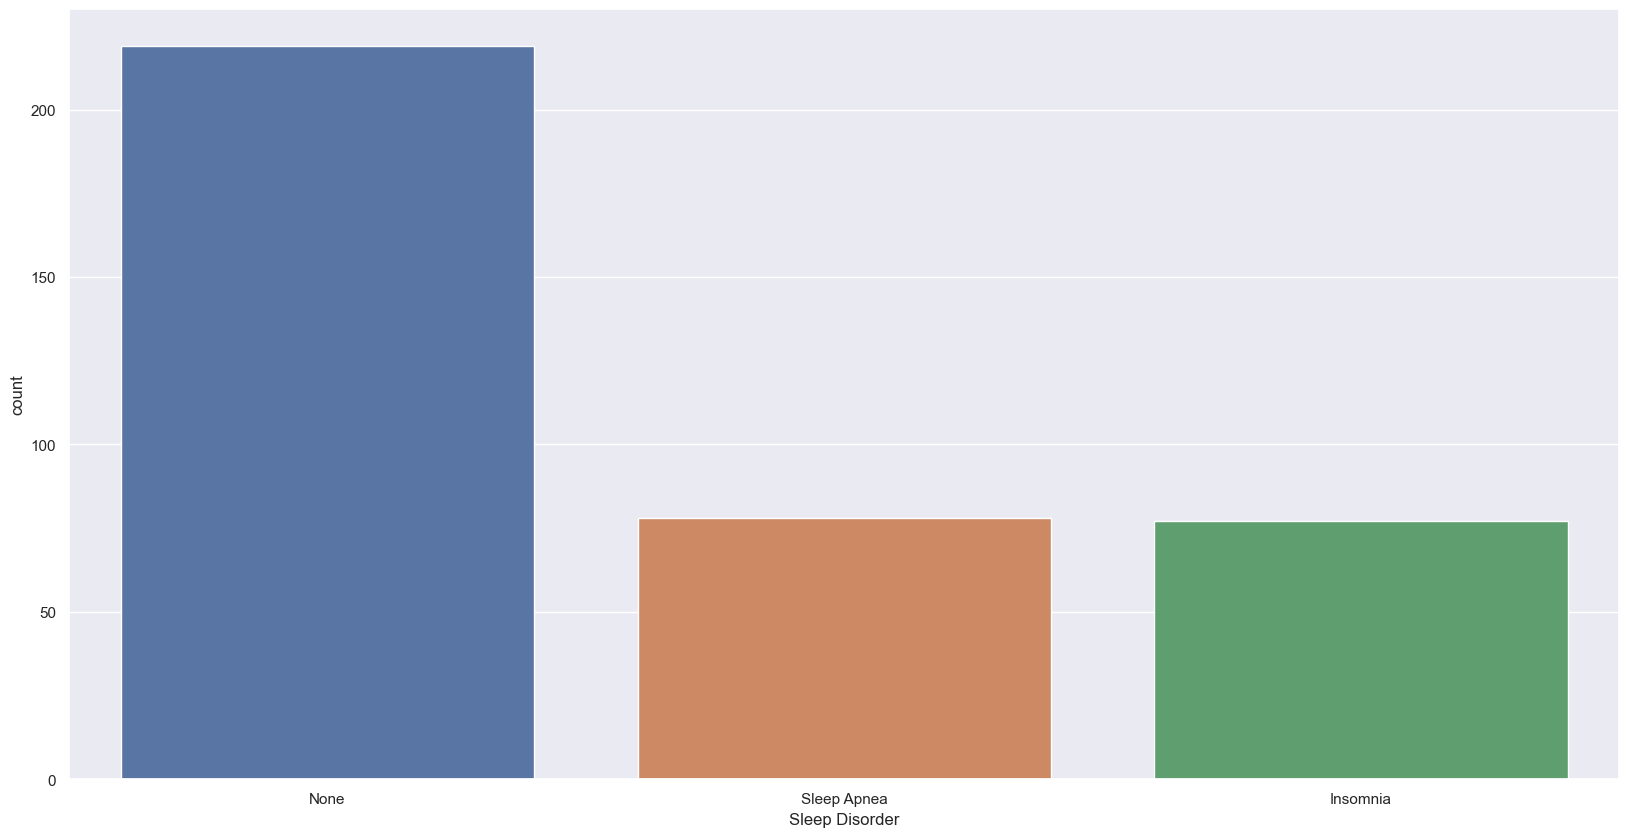

In [125]:
print(df['Sleep Disorder'].value_counts())

sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Sleep Disorder', data = df)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sleep Duration'}>,
        <AxesSubplot:title={'center':'Quality of Sleep'}>],
       [<AxesSubplot:title={'center':'Physical Activity Level'}>,
        <AxesSubplot:title={'center':'Stress Level'}>,
        <AxesSubplot:title={'center':'Heart Rate'}>],
       [<AxesSubplot:title={'center':'Daily Steps'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

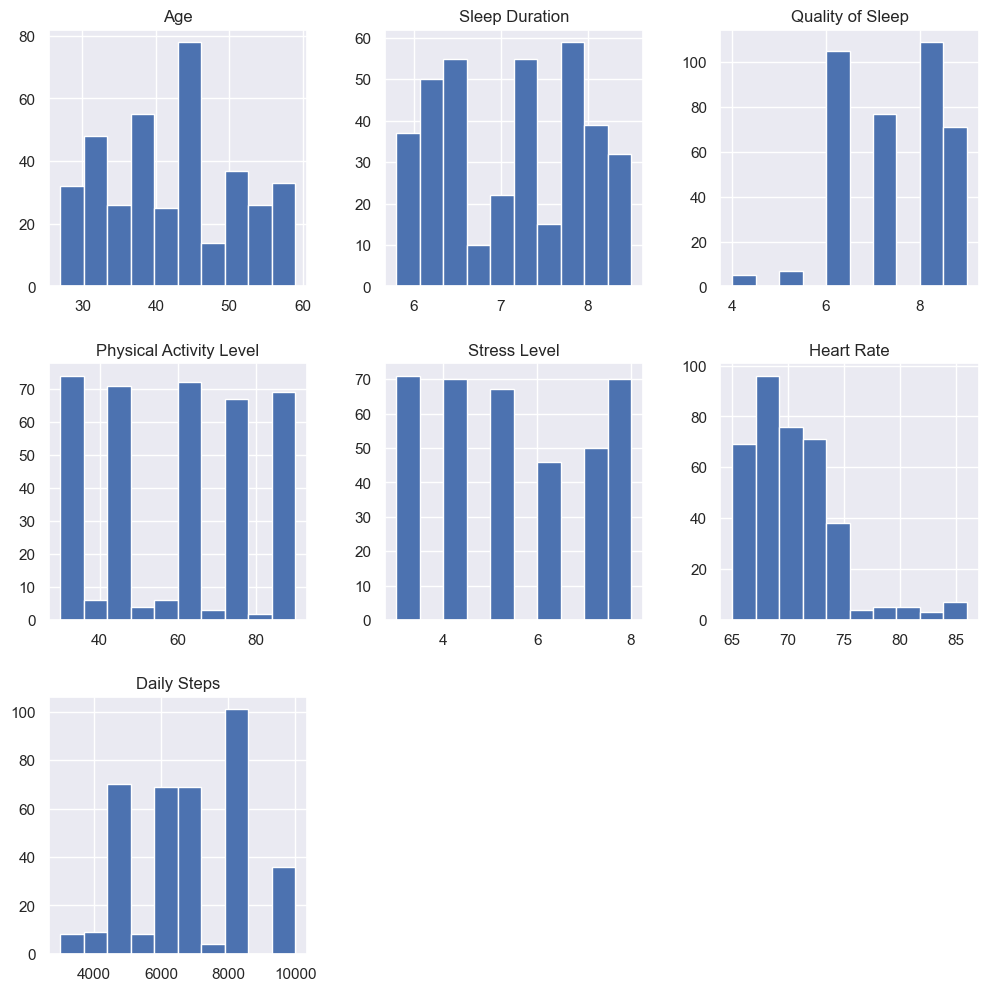

In [126]:
df.hist(figsize = (12, 12))

<Figure size 2500x2000 with 0 Axes>

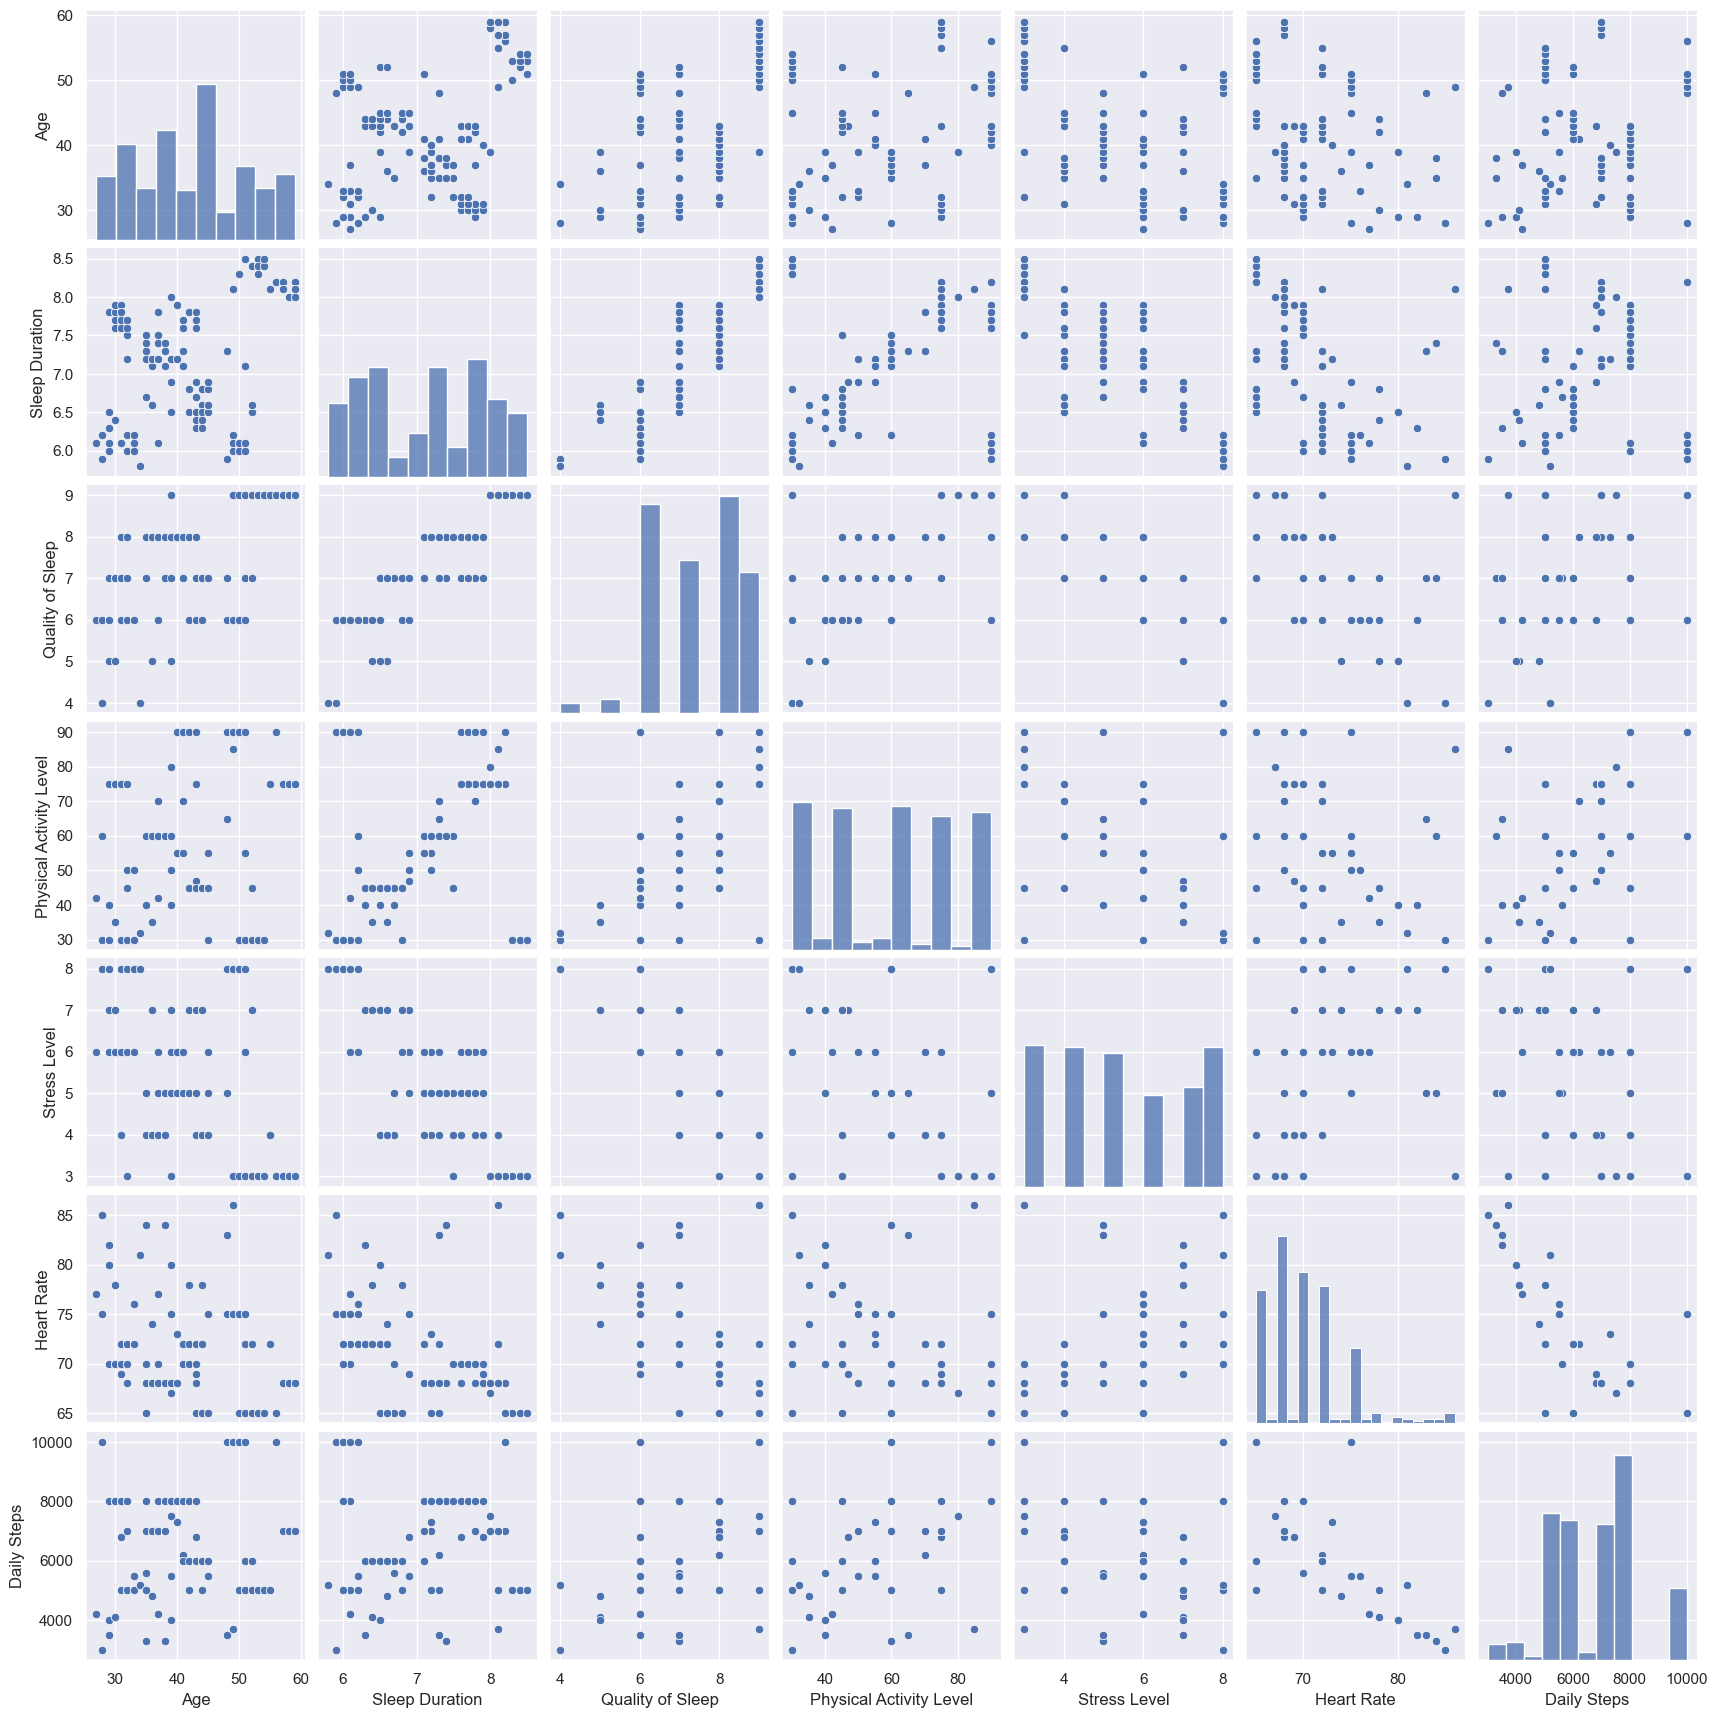

In [127]:
sns.set()
plt.figure(figsize = (25, 20))
sns.pairplot(data = df)
plt.show()

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


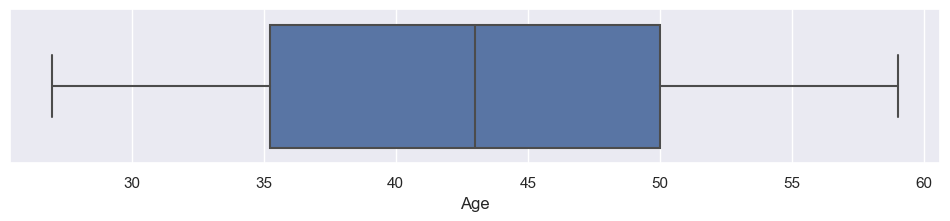

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


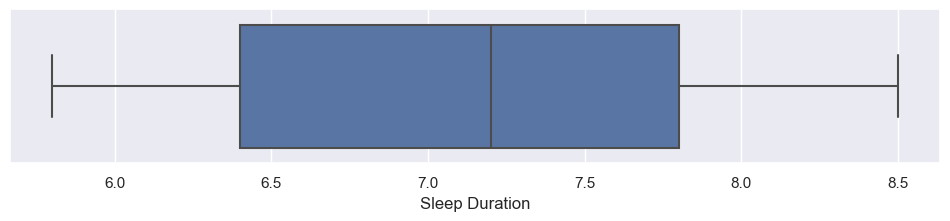

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


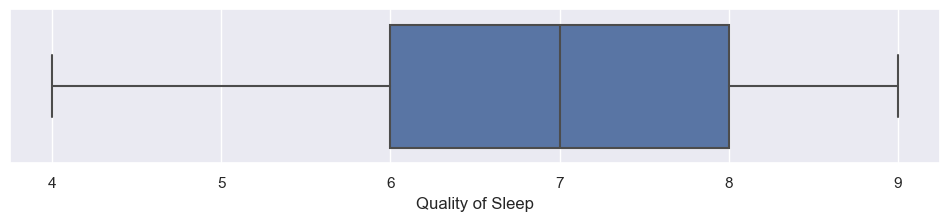

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


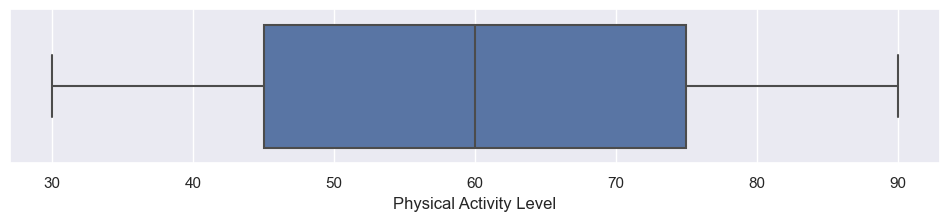

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


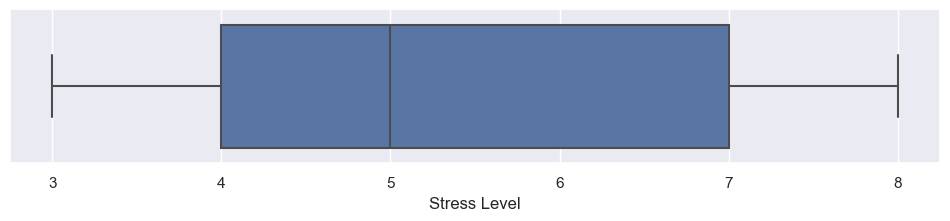

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


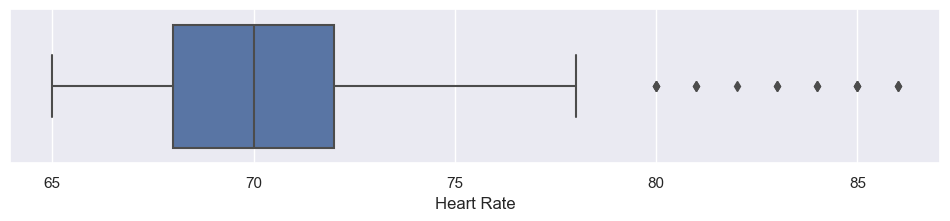

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


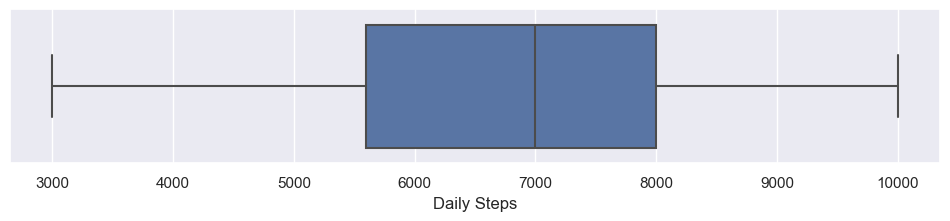

In [128]:
c = ('Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps')

for i in c:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[i])
    plt.show()

In [129]:
#Encode the catogarical data.
le = LabelEncoder()

In [130]:
c = np.sort(df['Gender'].unique())
print(c)
print(" ")

df['Gender'] = le.fit_transform(df[['Gender']])
j = 0

for i in c:
    print(i ,"---->", j)
    j = j + 1

['Female' 'Male']
 
Female ----> 0
Male ----> 1


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
c = np.sort(df['Occupation'].unique())
print(c)
print(" ")

df['Occupation'] = le.fit_transform(df[['Occupation']])
j = 0

for i in c:
    print(i ,"---->", j)
    j = j + 1

['Accountant' 'Doctor' 'Engineer' 'Lawyer' 'Manager' 'Nurse'
 'Sales Representative' 'Salesperson' 'Scientist' 'Software Engineer'
 'Teacher']
 
Accountant ----> 0
Doctor ----> 1
Engineer ----> 2
Lawyer ----> 3
Manager ----> 4
Nurse ----> 5
Sales Representative ----> 6
Salesperson ----> 7
Scientist ----> 8
Software Engineer ----> 9
Teacher ----> 10


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
c = np.sort(df['BMI Category'].unique())
print(c)
print(" ")

df['BMI Category'] = le.fit_transform(df[['BMI Category']])
j = 0

for i in c:
    print(i ,"---->", j)
    j = j + 1

['Normal' 'Normal Weight' 'Obese' 'Overweight']
 
Normal ----> 0
Normal Weight ----> 1
Obese ----> 2
Overweight ----> 3


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
c = np.sort(df['Blood Pressure'].unique())
print(c)
print(" ")

df['Blood Pressure'] = le.fit_transform(df[['Blood Pressure']])
j = 0

for i in c:
    print(i ,"---->", j)
    j = j + 1

['115/75' '115/78' '117/76' '118/75' '118/76' '119/77' '120/80' '121/79'
 '122/80' '125/80' '125/82' '126/83' '128/84' '128/85' '129/84' '130/85'
 '130/86' '131/86' '132/87' '135/88' '135/90' '139/91' '140/90' '140/95'
 '142/92']
 
115/75 ----> 0
115/78 ----> 1
117/76 ----> 2
118/75 ----> 3
118/76 ----> 4
119/77 ----> 5
120/80 ----> 6
121/79 ----> 7
122/80 ----> 8
125/80 ----> 9
125/82 ----> 10
126/83 ----> 11
128/84 ----> 12
128/85 ----> 13
129/84 ----> 14
130/85 ----> 15
130/86 ----> 16
131/86 ----> 17
132/87 ----> 18
135/88 ----> 19
135/90 ----> 20
139/91 ----> 21
140/90 ----> 22
140/95 ----> 23
142/92 ----> 24


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
c = np.sort(df['Sleep Disorder'].unique())
print(c)
print(" ")

df['Sleep Disorder'] = le.fit_transform(df[['Sleep Disorder']])
j = 0

for i in c:
    print(i ,"---->", j)
    j = j + 1

['Insomnia' 'None' 'Sleep Apnea']
 
Insomnia ----> 0
None ----> 1
Sleep Apnea ----> 2


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,1,28,6,5.9,4,30,8,2,22,85,3000,2
5,1,28,9,5.9,4,30,8,2,22,85,3000,0
6,1,29,10,6.3,6,40,7,2,22,82,3500,0
7,1,29,1,7.8,7,75,6,0,6,70,8000,1
8,1,29,1,7.8,7,75,6,0,6,70,8000,1
9,1,29,1,7.8,7,75,6,0,6,70,8000,1


In [136]:
x = df.drop(columns = 'Sleep Disorder', axis = 1)
y = df['Sleep Disorder']

In [137]:
x.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000


In [138]:
y.head(5)

0    1
1    1
2    1
3    2
4    2
Name: Sleep Disorder, dtype: int32

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10)

In [140]:
#Standarlize the data
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [141]:
x_train = pd.DataFrame(x_train ,columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level','BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'])
x_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,-0.990016,0.193582,2.118263,-0.664572,-0.268616,-0.667499,-0.776474,1.207909,0.983327,-1.278386,-0.529479
1,1.010084,-1.299381,-0.902535,0.704105,-0.268616,0.762173,0.345100,-0.895963,-1.003259,-0.005958,0.707834
2,-0.990016,0.882642,0.440042,-1.286698,-1.105242,1.477009,1.466674,1.207909,1.409024,1.266471,1.945148
3,1.010084,-1.184537,-0.902535,-1.411124,-1.105242,-1.382335,1.466674,-0.895963,-0.577562,0.503014,-1.148136
4,1.010084,-0.380634,-0.231246,0.081979,0.568011,0.047337,-0.215687,-0.895963,0.273832,-0.514929,0.707834


In [142]:
x_test = pd.DataFrame(x_test ,columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level','BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'])
x_test.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1.010084,0.193582,1.111330,-0.913423,-1.105242,-0.667499,0.905887,1.207909,0.273832,0.503014,-0.529479
1,-0.990016,0.767798,0.440042,-1.162273,-1.105242,1.477009,1.466674,1.207909,1.409024,1.266471,1.945148
2,-0.990016,0.308425,2.118263,-0.664572,-0.268616,-0.667499,-0.776474,1.207909,0.983327,-1.278386,-0.529479
3,-0.990016,0.997485,-0.566891,1.699507,1.404637,-1.382335,-1.337262,-0.895963,-0.577562,-1.278386,-1.148136
4,-0.990016,0.193582,2.118263,-0.664572,-0.268616,-0.667499,-0.776474,1.207909,0.983327,-1.278386,-0.529479


In [143]:
print("Standard Deviation of x_train")
print(x_train.std())
print("------------------------------------------------------------------------------------------------------------------")
print("Standard Deviation of x_test")
print(x_test.std())

Standard Deviation of x_train
Gender                     1.001676
Age                        1.001676
Occupation                 1.001676
Sleep Duration             1.001676
Quality of Sleep           1.001676
Physical Activity Level    1.001676
Stress Level               1.001676
BMI Category               1.001676
Blood Pressure             1.001676
Heart Rate                 1.001676
Daily Steps                1.001676
dtype: float64
------------------------------------------------------------------------------------------------------------------
Standard Deviation of x_test
Gender                     1.002390
Age                        0.977643
Occupation                 1.116719
Sleep Duration             0.948442
Quality of Sleep           1.006586
Physical Activity Level    0.962037
Stress Level               0.975213
BMI Category               1.016746
Blood Pressure             1.037187
Heart Rate                 1.231417
Daily Steps                0.998844
dtype: float64


In [101]:
#Logistic Regression
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [103]:
lgr_train_data_pre = lgr.predict(x_train)
lgr_test_data_pre = lgr.predict(x_test)

lgr_train_data_acc = accuracy_score(y_train, lgr_train_data_pre)
lgr_test_data_acc = accuracy_score(y_test, lgr_test_data_pre)

print("Accuracy score for train data prediction ", lgr_train_data_acc)
print(" ")
print("Accuracy score for test data prediction ", lgr_test_data_acc)

Accuracy score for train data prediction  0.9063545150501672
 
Accuracy score for test data prediction  0.88


In [107]:
#KNeighborsClassifier

for i in range(1, 20):
    
    print(" n_neighors = ", i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    knn_train_data_pre = knn.predict(x_train)
    knn_test_data_pre = knn.predict(x_test)

    knn_train_data_acc = accuracy_score(y_train, knn_train_data_pre)
    knn_test_data_acc = accuracy_score(y_test, knn_test_data_pre)

    print("Accuracy score for train data prediction ", knn_train_data_acc)
    print(" ")
    print("Accuracy score for test data prediction ", knn_test_data_acc)
    print("")
    print("-------------------------------------------------------------------------------------------------------")

 n_neighors =  1


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score for train data prediction  0.9096989966555183
 
Accuracy score for test data prediction  0.8666666666666667

-------------------------------------------------------------------------------------------------------
 n_neighors =  2
Accuracy score for train data prediction  0.8729096989966555
 
Accuracy score for test data prediction  0.8

-------------------------------------------------------------------------------------------------------
 n_neighors =  3
Accuracy score for train data prediction  0.9063545150501672
 
Accuracy score for test data prediction  0.88

-------------------------------------------------------------------------------------------------------
 n_neighors =  4
Accuracy score for train data prediction  0.8963210702341137
 
Accuracy score for test data prediction  0.84

-------------------------------------------------------------------------------------------------------
 n_neighors =  5
Accuracy score for train data prediction  0.9063545150501672
 


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score for train data prediction  0.9096989966555183
 
Accuracy score for test data prediction  0.88

-------------------------------------------------------------------------------------------------------
 n_neighors =  7
Accuracy score for train data prediction  0.9063545150501672
 
Accuracy score for test data prediction  0.8666666666666667

-------------------------------------------------------------------------------------------------------
 n_neighors =  8
Accuracy score for train data prediction  0.8963210702341137
 
Accuracy score for test data prediction  0.8666666666666667

-------------------------------------------------------------------------------------------------------
 n_neighors =  9
Accuracy score for train data prediction  0.903010033444816
 
Accuracy score for test data prediction  0.8666666666666667

-------------------------------------------------------------------------------------------------------
 n_neighors =  10
Accuracy score for train data pred

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score for train data prediction  0.8996655518394648
 
Accuracy score for test data prediction  0.8533333333333334

-------------------------------------------------------------------------------------------------------
 n_neighors =  12
Accuracy score for train data prediction  0.8929765886287625
 
Accuracy score for test data prediction  0.84

-------------------------------------------------------------------------------------------------------
 n_neighors =  13
Accuracy score for train data prediction  0.903010033444816
 
Accuracy score for test data prediction  0.84

-------------------------------------------------------------------------------------------------------
 n_neighors =  14
Accuracy score for train data prediction  0.8963210702341137
 
Accuracy score for test data prediction  0.84

-------------------------------------------------------------------------------------------------------
 n_neighors =  15
Accuracy score for train data prediction  0.896321070234113

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [108]:
i = 5
    
print(" n_neighors = ", i)
knn = KNeighborsClassifier(n_neighbors = i)
knn.fit(x_train, y_train)
    
knn_train_data_pre = knn.predict(x_train)
knn_test_data_pre = knn.predict(x_test)

knn_train_data_acc = accuracy_score(y_train, knn_train_data_pre)
knn_test_data_acc = accuracy_score(y_test, knn_test_data_pre)

print("Accuracy score for train data prediction ", knn_train_data_acc)
print(" ")
print("Accuracy score for test data prediction ", knn_test_data_acc)
print("")
print("-------------------------------------------------------------------------------------------------------")

 n_neighors =  5
Accuracy score for train data prediction  0.9063545150501672
 
Accuracy score for test data prediction  0.8933333333333333

-------------------------------------------------------------------------------------------------------


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [145]:
#DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [146]:
dtc_train_data_pre = dtc.predict(x_train)
dtc_test_data_pre = dtc.predict(x_test)

dtc_train_data_acc = accuracy_score(y_train, dtc_train_data_pre)
dtc_test_data_acc = accuracy_score(y_test, dtc_test_data_pre)

print("Accuracy score for train data prediction ", dtc_train_data_acc)
print(" ")
print("Accuracy score for test data prediction ", dtc_test_data_acc)

Accuracy score for train data prediction  0.9364548494983278
 
Accuracy score for test data prediction  0.8533333333333334


In [109]:
#Random Forest classsification

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
    
rfc_train_data_pre = rfc.predict(x_train)
rfc_test_data_pre = rfc.predict(x_test)

rfc_train_data_acc = accuracy_score(y_train, rfc_train_data_pre)
rfc_test_data_acc = accuracy_score(y_test, rfc_test_data_pre)

print("Accuracy score for train data prediction ", rfc_train_data_acc)
print(" ")
print("Accuracy score for test data prediction ", rfc_test_data_acc)

Accuracy score for train data prediction  0.9364548494983278
 
Accuracy score for test data prediction  0.9066666666666666


In [151]:
acc = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'], 'Accuracy score train data':[lgr_train_data_acc, knn_train_data_acc, dtc_train_data_acc, rfc_train_data_acc], 'Accuracy score test data':[lgr_test_data_acc, knn_test_data_acc, dtc_train_data_acc, rfc_test_data_acc]})  
  
print(acc)  

                Algorithm  Accuracy score train data  Accuracy score test data
0      LogisticRegression                   0.906355                  0.880000
1    KNeighborsClassifier                   0.906355                  0.893333
2  DecisionTreeClassifier                   0.936455                  0.936455
3  RandomForestClassifier                   0.936455                  0.906667


In [161]:
inputdata = (1, 27, 9, 6.1, 6, 42, 6, 3, 11, 77, 4200) 
inputarr = np.asarray(inputdata).reshape(1, -1)

dtc_pre = dtc.predict(inputarr)
print("Predicted value using DecisionTreeClassifier = ", dtc_pre)

print(" ")
if(dtc_pre == 0):
    print("Predicted value using DecisionTreeClassifier is Insomnia")
    
elif(dtc_pre == 1):
    print("Predicted value using DecisionTreeClassifier is None")
    
elif(dtc_pre == 2):
    print("Predicted value using DecisionTreeClassifier is Sleep Apnea")

Predicted value using DecisionTreeClassifier =  [2]
 
Predicted value using DecisionTreeClassifier is Sleep Apnea


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
